In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget
import os
import pandas as pd

ROOT_DIR = os.popen('git rev-parse --show-toplevel').read().strip()


In [30]:
# Read the last log folder path from last_log.txt

with open(f"{ROOT_DIR}/last_log.txt", "r") as file:
     last_folder_path = file.read().strip()

folder_path = last_folder_path if os.path.exists(last_folder_path) else print(f"Last log folder path '{last_folder_path}' does not exist.")
log_name = folder_path.split("/")[-1]

print(log_name)

df = pd.read_csv(f"{folder_path}/{log_name}_log.csv")

backstepping_Shen_custom_fault_observer_temp


In [ ]:
# Manual log name entry

log_name = "backstepping_Shen_custom_fault_observer_temp"
folder_path = f"data_logs/{log_name}"

df = pd.read_csv(f"{ROOT_DIR}/{folder_path}/{log_name}_log.csv")

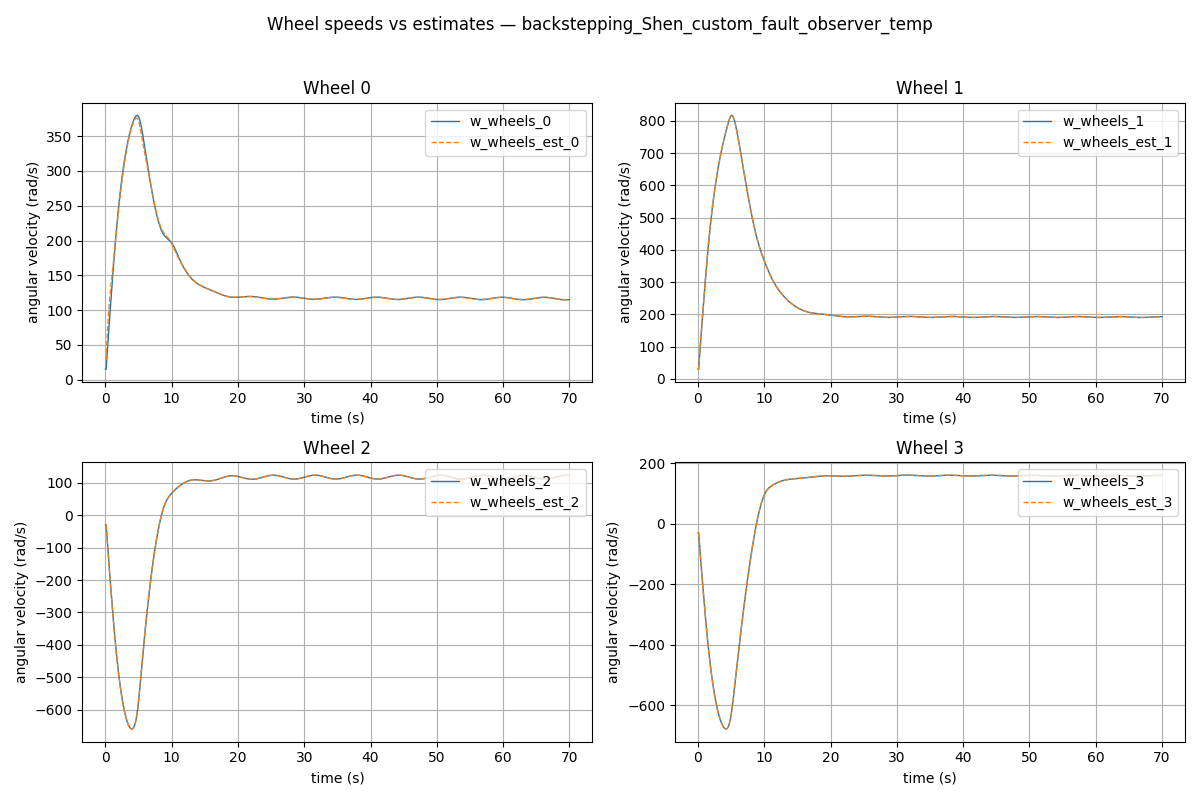

In [27]:
# plot actual vs estimated wheel speeds for all 4 wheels
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i in range(4):
    axs[i].plot(df['time'], df[f'w_wheels_{i}'], label=f'w_wheels_{i}', linewidth=1)
    axs[i].plot(df['time'], df[f'w_wheels_est_{i}'], '--', label=f'w_wheels_est_{i}', linewidth=1)
    axs[i].set_xlabel('time (s)')
    axs[i].set_ylabel('angular velocity (rad/s)')
    axs[i].set_title(f'Wheel {i}')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

fig.suptitle(f'Wheel speeds vs estimates — {log_name}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

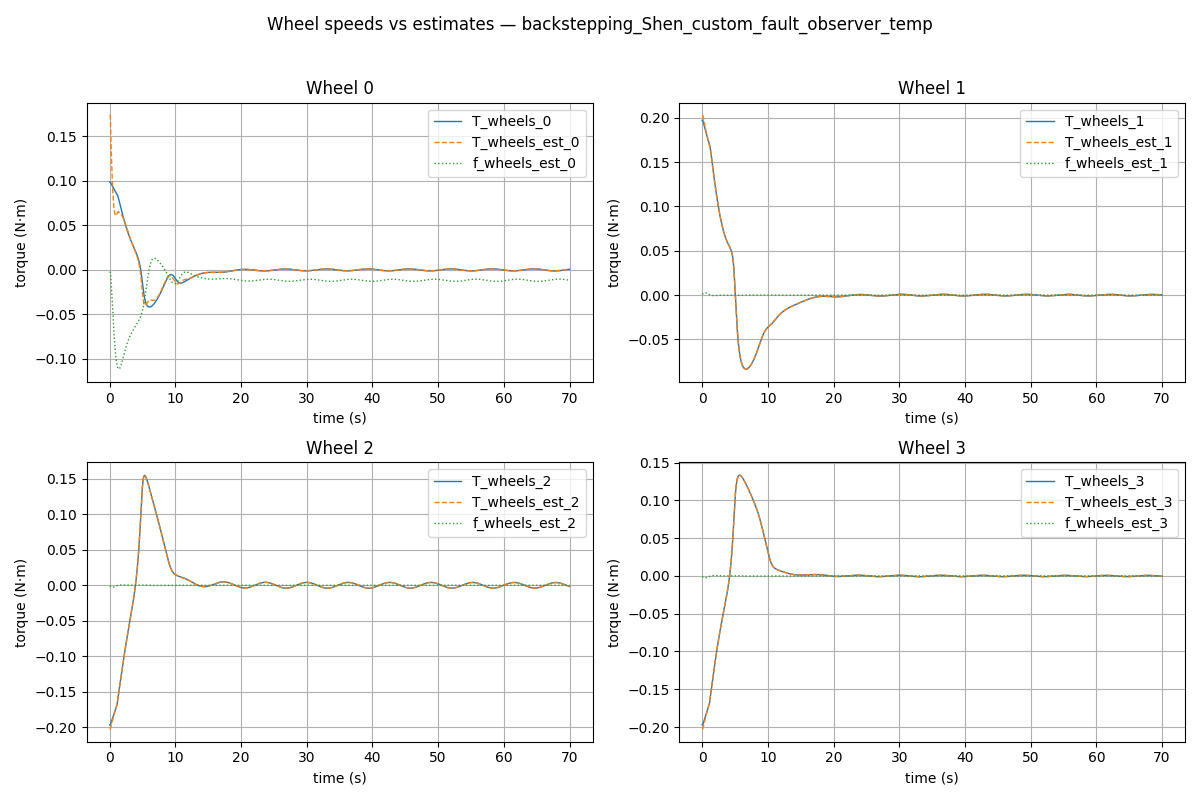

In [25]:
# plot actual vs estimated wheel speeds for all 4 wheels
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i in range(4):
    axs[i].plot(df['time'], df[f'T_wheels_{i}'], label=f'T_wheels_{i}', linewidth=1)
    axs[i].plot(df['time'], df[f'T_wheels_est_{i}'], '--', label=f'T_wheels_est_{i}', linewidth=1)
    axs[i].plot(df['time'], df[f'f_wheels_est_{i}'], ':', label=f'f_wheels_est_{i}', linewidth=1)
    axs[i].set_xlabel('time (s)')
    axs[i].set_ylabel('torque (N·m)')
    axs[i].set_title(f'Wheel {i}')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

fig.suptitle(f'Wheel speeds vs estimates — {log_name}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()